## Primeros modelos KERAS sobre MNIST

Vamos a implementar las primeras redes neuronales para el conjunto de datos MNIST

IMPORTAMOS el Dataset y lo normalizamos:

In [1]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

training set (60000, 28, 28)
test set (10000, 28, 28)


## Modelos secuenciales en KERAS

Los modelos secuenciales son modelos donde las capas se van añadiendo una tras otra. Te permite crear topologías básicas sin conexiones que no sean estrictamente lineales.

La red neuronal a crear es la siguiente:

- Capa de entrada de 784 neuronas, acorde con la dimensionalidad de los datos
- Capa oculta de 512 neuronas, con función de activación ReLU
- Capa de salida de 10 neuronas, acorde con el número de clases. Al ser un problema de clasificación emplearemos la función de activación Softmax

Este sería la definición del modelo:

In [2]:
from keras import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(784))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![model summary](summary.png)

El summary del modelo nos lista las diferentes capas del mismo así como su número de parámetros. Por ejemplo la capa densa oculta tiene 784 entradas x 512 salidas lo que implica una matriz de 784x512 = 401408 componentes. Además esta capa Dense tiene un vector de bias de 512 componentes, por lo tanto en total son 401408+512 = **401920**, que coincide con el número de parámetros de la tabla para dicha capa.

Podemos generar una imagen con la topología del modelo:

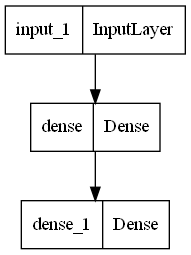

In [3]:
keras.utils.plot_model(model, to_file="model.png")

## Compilar el modelo 

Para terminar la definición de nuestro modelo debemos definir dos componentes muy importantes:

1. Función de pérdida. En nuestro caso al ser un problema de clasificación emplearemos la **categorical_crossentropy**
2. Optimizador. En nuestro caso y para empezar emplearemos un sencillo descenso por gradiente estocástico **SGD**

opcionalmente:

3. Definir una métrica asociada a la calidad del modelo. En nuestro caso sería la tasa de acierto **accuracy**


Una vez definidos pasamos a compilar el modelo:

In [4]:
from keras.optimizers import SGD

sgd=SGD(learning_rate=0.01, momentum=0.9)

# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



## Entrenar el modelo

Una vez tenemos los datos cargados y normalizados, así como el modelo ya compilado, podemos realizar el entrenamiento mediante el método **fit**. Para ello previamente necesitamos definir el tamaño del batch así como el número de epochs.

Al mismo tiempo que entrenamos el modelo con los datos de entrenamiento vamos a ir evaluando dicho modelo sobre los datos de test. Además, vamos generando un **history** con la evolución del modelo para luego poder crear gráficas del mismo.

In [5]:
batch_size=32
epochs=25

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 23s 11ms/step - loss: 0.2849 - accuracy: 0.9184 - val_loss: 0.1519 - val_accuracy: 0.9551
Epoch 2/25
1306/1875 [===================>..........] - ETA: 5s - loss: 0.1319 - accuracy: 0.9616

KeyboardInterrupt: 

## Explorar el History

Realizar gráfica con resultados de accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


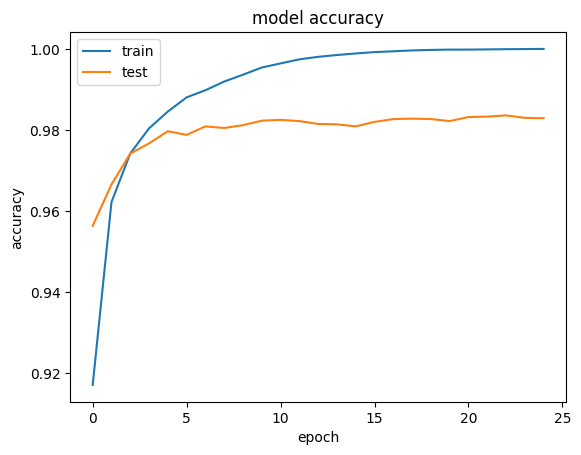

In [ ]:
print(history.history.keys())

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Realizar gráfica con resultados de loss

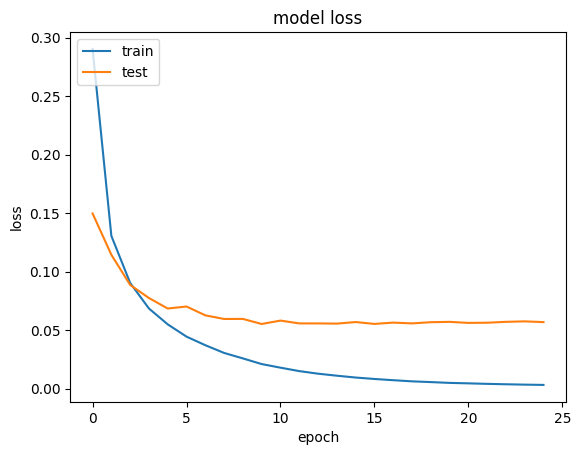

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Salvar y cargar el modelo

Normalmente necesitaremos salvar el modelo entrenado para emplearlo más tarde en producción (inferencia)



In [ ]:
# Cargar datos y normalizar
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# crear modelo y entrenar
from keras import Sequential
from keras.layers import Dense, Input

model = Sequential()

model.add(Input(784))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

from keras.optimizers import SGD

sgd=SGD(learning_rate=0.01, momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])



batch_size=32
epochs=25

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


# guardar modelo
model.save("model.keras")

# cargar modelo
from keras.models import load_model
model = load_model("model.keras")

# evaluar modelo
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


### **Ejercicio** 

probar diferentes entrenamientos dependiendo de los siguientes valores y anotar el accuracy en test alcanzado

| Dense/Batch  | 16  | 32  |  64 | 128  |
|---|---|---|---|---|
|  256  | 0.9834  | 0.9819  |  0.9826 |  0.9788 |
|  512  |  0.9846 | 0.9836  |   0.9825| 0.9810  |
|  1024 |  0.9842000007629395 |   |   |   |

In [6]:
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('training set', x_train.shape)
print('test set', x_test.shape)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# crear modelo y entrenar
from keras import Sequential
from keras.layers import Dense, Input
rendimiento = [] 
for num_neuronas in [16, 32, 64, 128]:
    for b in [256, 512, 1024]:   
        model = Sequential()
        model.add(Input(784))
        model.add(Dense(num_neuronas, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.summary()
        from keras.optimizers import SGD
        sgd=SGD(learning_rate=0.01, momentum=0.9)
        model.compile(loss='categorical_crossentropy',
                    optimizer=sgd,
                    metrics=['accuracy'])
        batch_size=b
        epochs=25
        history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test, y_test));
        # guardar modelo
        model.save("model.keras");
        # cargar modelo
        from keras.models import load_model
        model = load_model("model.keras");
        # evaluar modelo
        score = model.evaluate(x_test, y_test, verbose=0);
        print('\n Batch: ' + str(b) + " Num. Neuronas capa densa: " + str(num_neuronas))
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        rendimiento.append( "\n Batch: " + str(b) + "\n" +" Num. Neuronas capa densa: " + str(num_neuronas) + "\n" + "Test loss : " + str(score[0]) + " \n Test accuracy: " + str(score[1]))

for elem in rendimiento:
    print(elem) 

training set (60000, 28, 28)
test set (10000, 28, 28)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                12560     
                                                                 
 dense_21 (Dense)            (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
235/235 [==============================] - 1s 4ms/step - loss: 0.8295 - accuracy: 0.7588 - val_loss: 0.3973 - val_accuracy: 0.8875
Epoch 2/25
235/235 [==============================] - 1s 3ms/step - loss: 0.3668 - accuracy: 0.8961 - val_loss: 0.3231 - val_accuracy: 0.9069
Epoch 3/25
235/235 [==============================] - 1s 3ms/step - loss: 0

 Batch: 256
 Num. Neuronas capa densa: 16
Test loss : 0.1732926368713379 
 Test accuracy: 0.9473000168800354

 Batch: 512
 Num. Neuronas capa densa: 16
Test loss : 0.2038806974887848 
 Test accuracy: 0.9415000081062317

 Batch: 1024
 Num. Neuronas capa densa: 16
Test loss : 0.2550564110279083 
 Test accuracy: 0.927299976348877

 Batch: 256
 Num. Neuronas capa densa: 32
Test loss : 0.1364404261112213 
 Test accuracy: 0.9599000215530396

 Batch: 512
 Num. Neuronas capa densa: 32
Test loss : 0.1624298244714737 
 Test accuracy: 0.9549000263214111

 Batch: 1024
 Num. Neuronas capa densa: 32
Test loss : 0.22358490526676178 
 Test accuracy: 0.9351999759674072

 Batch: 256
 Num. Neuronas capa densa: 64
Test loss : 0.10858570784330368 
 Test accuracy: 0.968500018119812

 Batch: 512
 Num. Neuronas capa densa: 64
Test loss : 0.13772566616535187 
 Test accuracy: 0.9593999981880188

 Batch: 1024
 Num. Neuronas capa densa: 64
Test loss : 0.19662359356880188 
 Test accuracy: 0.944599986076355

 Batch: 256
 Num. Neuronas capa densa: 128
Test loss : 0.09228753298521042 
 Test accuracy: 0.9729999899864197

 Batch: 512
 Num. Neuronas capa densa: 128
Test loss : 0.13093824684619904 
 Test accuracy: 0.9625999927520752

 Batch: 1024
 Num. Neuronas capa densa: 128
Test loss : 0.18620789051055908 
 Test accuracy: 0.9476000070571899
